# About the Project

The purpose of the project is to predict the next day closing price of Amazon using y_finance library

# Process of the project

* Ask the question
* Get Data
* Investigate Data
* Prepare Data
* Analyze Data
* Preprocessing
* Model Design
* Model Training
* Model Testing
* Close Price Prediction

## Ask the question

* The analytics process always begins with a question to be answered. In this project, the question pertains to the closing price of Amazon. Specifically, the query is: "What is the Amazon closing price for the next day?"

## Get Data

* This step involves the process of locating and obtaining data that is relevant to the question, and then determining if there is enough data to complete the analysis. To proceed, acquire 10 years of Amazon data from Yahoo Finance.

In [1]:
import yfinance as yf

amazon_price = yf.download('AMZN', period="10y")

[*********************100%%**********************]  1 of 1 completed


In [2]:
#display the data
amazon_price.head()

Open    High      Low    Close  Adj Close    Volume
Date                                                              
2014-05-16  14.6400  14.944  14.5775  14.8850    14.8850  72736000
2014-05-19  14.7880  14.950  14.6905  14.8380    14.8380  45684000
2014-05-20  14.8550  15.223  14.8375  15.0595    15.0595  81914000
2014-05-21  15.1105  15.298  15.0760  15.2505    15.2505  68176000
2014-05-22  15.2525  15.427  15.1505  15.2455    15.2455  51536000

## Investigate the data

* Data comes in many forms and from various sources. This step involves determining if the data is complete and contains the relevant information necessary for the analysis.

## Prepare the data

* This step can encompass various tasks aimed at transforming the data into a format suitable for the tools that will be used for analysis and presentation. This process is often referred to as "data cleaning" because it involves rectifying issues such as blank records or obvious errors in the dataset. This phase ensures that the data is prepared and ready for analysis.

#### Shape of the data

In [3]:
#checking the shape of the date
amazon_price.shape

(2517, 6)

#### Checking Colunm Names

In [4]:
#check the attributes of the dataset
amazon_price.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Missing Values

In [5]:
#check the null values
amazon_price.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Duplicates

In [6]:
# check the duplicates
amazon_price.duplicated().sum()

0

#### Unique Values

In [ ]:
# count unique values in dataset
amazon_price.nunique()

#### Information about the data

In [7]:
# check the information about the data
amazon_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-05-16 to 2024-05-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


#### Statistical Summary

In [8]:
# calculate statics of the data
amazon_price.describe().T

count          mean           std           min           25%  \
Open       2517.0  9.019019e+01  5.235882e+01  1.422000e+01  3.905150e+01   
High       2517.0  9.122659e+01  5.298409e+01  1.452100e+01  3.932500e+01   
Low        2517.0  8.906489e+01  5.167837e+01  1.420000e+01  3.865600e+01   
Close      2517.0  9.016760e+01  5.232403e+01  1.434750e+01  3.901850e+01   
Adj Close  2517.0  9.016760e+01  5.232403e+01  1.434750e+01  3.901850e+01   
Volume     2517.0  7.846425e+07  4.086761e+07  1.762600e+07  5.284150e+07   

                    50%           75%           max  
Open       8.965000e+01  1.366835e+02  1.891600e+02  
High       9.028850e+01  1.388100e+02  1.917000e+02  
Low        8.857400e+01  1.350100e+02  1.874400e+02  
Close      8.953300e+01  1.372800e+02  1.895000e+02  
Adj Close  8.953300e+01  1.372800e+02  1.895000e+02  
Volume     6.723800e+07  9.160000e+07  4.771220e+08

#### Distribution of the data

In [9]:
# find the ditributiob of the data
from scipy.stats import shapiro

# Selecting only numerical columns for normality test
numerical_columns = amazon_price.select_dtypes(include='number')

# Perform Shapiro-Wilk test for normality for each numerical column
for column in numerical_columns.columns:
    statistic, p_value = shapiro(amazon_price[column])
    alpha = 0.05  # Significance level
    if p_value > alpha:
        print(f"The {column} values are normally distributed (fail to reject H0)")
    else:
        print(f"The {column} values are not normally distributed (reject H0)")


The Open values are not normally distributed (reject H0)
The High values are not normally distributed (reject H0)
The Low values are not normally distributed (reject H0)
The Close values are not normally distributed (reject H0)
The Adj Close values are not normally distributed (reject H0)
The Volume values are not normally distributed (reject H0)


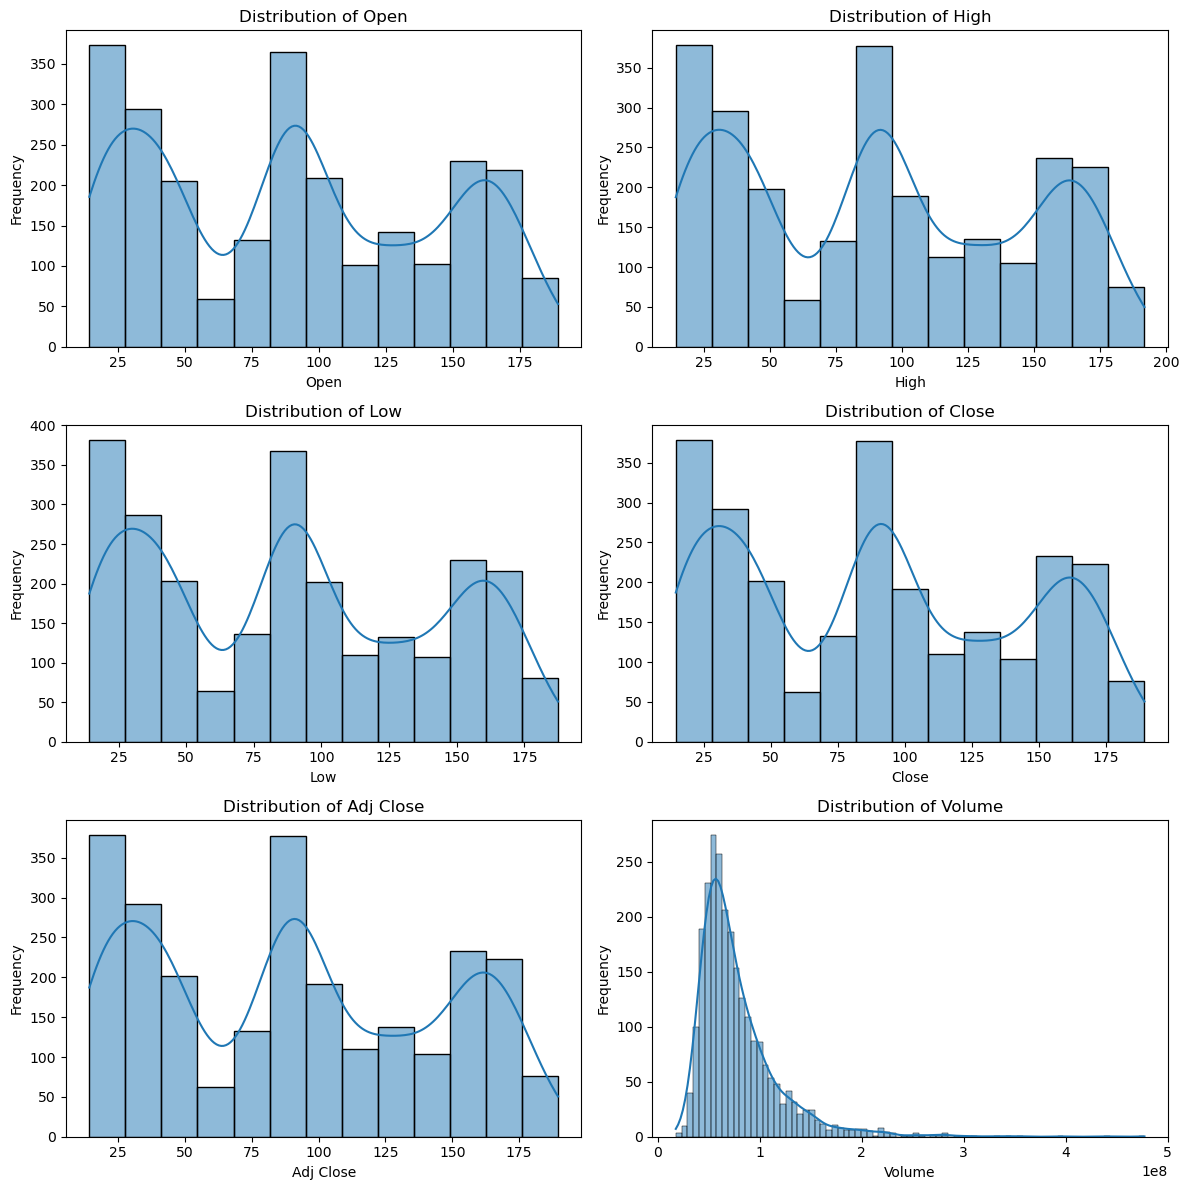

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Select the columns for which you want to visualize the distributions
columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']

# Create histograms or kernel density plots for each variable
plt.figure(figsize=(12, 12))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(amazon_price[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Skewness of the data

In [11]:
# check the skweness of the data
from scipy.stats import skew
import numpy as np

# Calculate skewness for each numerical column
skewness = amazon_price.apply(skew)

# Display skewness values
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Open         0.165391
High         0.160924
Low          0.169361
Close        0.164139
Adj Close    0.164139
Volume       2.685104
dtype: float64


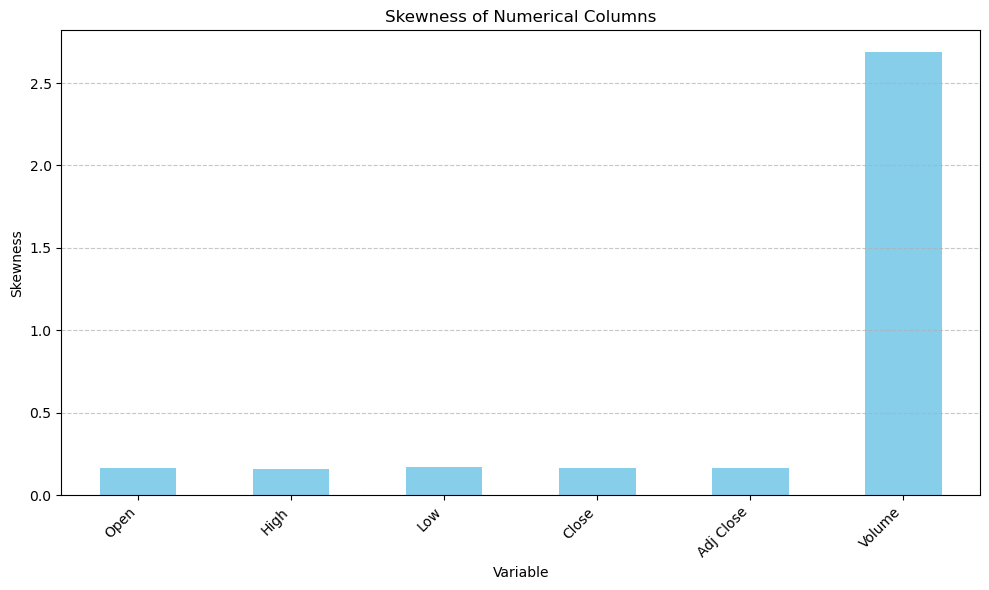

In [12]:
# Create a bar plot to visualize skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Variable')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Outlier Detection

In [13]:
#detect oulier

def detect_outliers_iqr(data):
    # Select numerical columns for outlier detection
    numeric_columns = data.select_dtypes(include=['number'])

    # Calculate the first quartile (Q1) and third quartile (Q3) for each numerical column
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)

    # Calculate the interquartile range (IQR) for each numerical column
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each numerical column
    outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

    # Display the count of outliers for each numerical column
    print("Count of outliers for each numerical column:")
    print(outliers.sum())

    # Display the rows with outliers
    outlier_rows = data[outliers.any(axis=1)]
    print("Rows with outliers:")
    print(outlier_rows)
    
    return outliers, outlier_rows

In [14]:
# Detect outliers using the function
outliers, outlier_rows = detect_outliers_iqr(amazon_price)

Count of outliers for each numerical column:
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       139
dtype: int64
Rows with outliers:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-06-05   15.405000   16.396999   15.345000   16.178499   16.178499   
2014-07-11   16.735500   17.350000   16.735500   17.309999   17.309999   
2014-07-25   15.865000   16.243500   15.738000   16.200500   16.200500   
2014-10-23   15.670000   15.840000   15.570000   15.659000   15.659000   
2014-10-24   14.220000   14.690500   14.200000   14.353000   14.353000   
...                ...         ...         ...         ...         ...   
2022-11-01  103.989998  104.580002   96.059998   96.790001   96.790001   
2022-11-10   92.940002   98.690002   91.650002   96.629997   96.629997   
2023-02-02  110.250000  114.000000  108.879997  112.910004  112.910004   
2023-0

#### Handle Outliers

In [15]:
# Define the columns with a significant number of outliers
column_with_outliers = ['Volume']

# Winsorization function to handle outliers
def winsorize_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)
    return column

# Transformation function (log transformation) to handle outliers
def log_transform(column):
    return np.log1p(column)

# Apply outlier handling techniques for each column
for column in column_with_outliers:
    if column in ['Volume']:
        # Apply Winsorization for columns with a large number of outliers
        amazon_price[column] = winsorize_outliers(amazon_price[column])
    elif column in ['Open', 'High', 'Low', 'Close','Adj Close']:
        # Apply log transformation for columns with a large number of outliers
        amazon_price[column] = log_transform(amazon_price[column])

# Print the modified dataset after outlier handling
print(amazon_price)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-05-16   14.640000   14.944000   14.577500   14.885000   14.885000   
2014-05-19   14.788000   14.950000   14.690500   14.838000   14.838000   
2014-05-20   14.855000   15.223000   14.837500   15.059500   15.059500   
2014-05-21   15.110500   15.298000   15.076000   15.250500   15.250500   
2014-05-22   15.252500   15.427000   15.150500   15.245500   15.245500   
...                ...         ...         ...         ...         ...   
2024-05-09  188.880005  191.699997  187.440002  189.500000  189.500000   
2024-05-10  189.160004  189.889999  186.929993  187.479996  187.479996   
2024-05-13  188.000000  188.309998  185.360001  186.570007  186.570007   
2024-05-14  183.820007  187.720001  183.449997  187.070007  187.070007   
2024-05-15  185.970001  186.720001  182.729996  185.990005  185.990005   

                Volume  
Date        

## Analyse data

* Analysis is the process of identifying patterns, correlations, and relationships contained within a dataset or datasets to draw inferences and conclusions.

#### Explorative Data Analysis

In [16]:
from ydata_profiling import ProfileReport

In [17]:
#initialize profile variable to use it to find the analytics about the data
profile= ProfileReport(amazon_price,title="Amazon Report", explorative=True)

In [18]:
#Output the report about the data
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Pattern/Trend

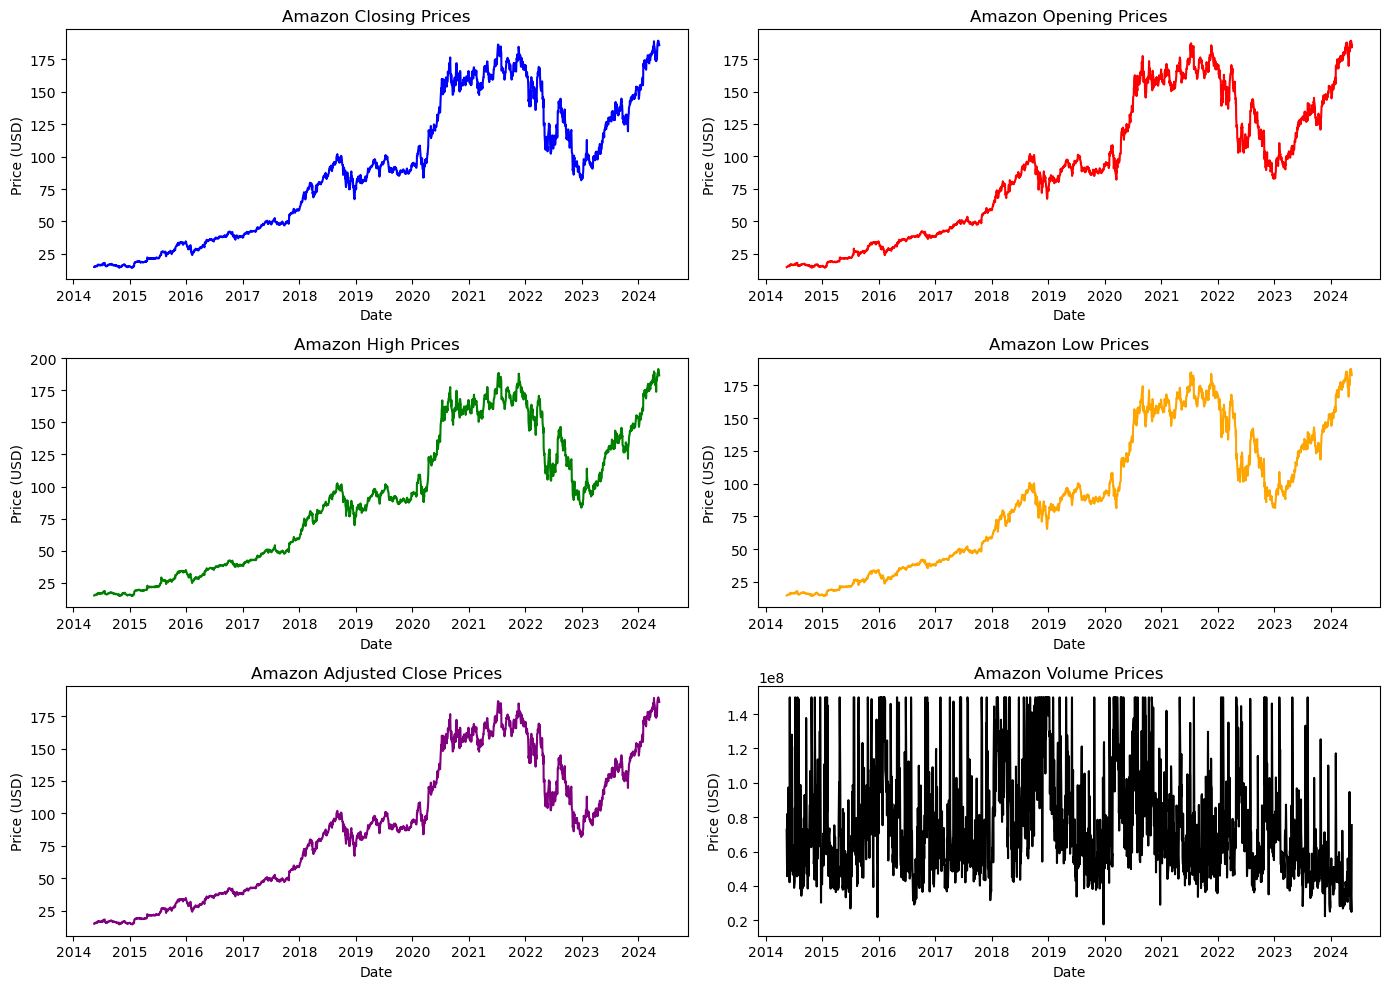

In [19]:
import pandas as pd 

# Create a figure and axis object with 2 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Reset index to default integer index
amazon_price = amazon_price.reset_index()

# Plot Closing Price
amazon_price['Date'] = pd.to_datetime(amazon_price['Date'])  # Convert 'Date' column to datetime if it's not already
axs[0, 0].plot(amazon_price['Date'], amazon_price['Close'], color='blue', label='Closing Price')
axs[0, 0].set_title('Amazon Closing Prices')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price (USD)')

# Plot Opening Price
axs[0, 1].plot(amazon_price['Date'], amazon_price['Open'], color='red', label='Opening Price')
axs[0, 1].set_title('Amazon Opening Prices')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price (USD)')

# Plot High Price
axs[1, 0].plot(amazon_price['Date'], amazon_price['High'], color='green', label='High Price')
axs[1, 0].set_title('Amazon High Prices')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Price (USD)')

# Plot Low Price
axs[1, 1].plot(amazon_price['Date'], amazon_price['Low'], color='orange', label='Low Price')
axs[1, 1].set_title('Amazon Low Prices')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Price (USD)')

# Plot Adjusted Close Price
axs[2, 0].plot(amazon_price['Date'], amazon_price['Adj Close'], color='purple', label='Adjusted Close Price')
axs[2, 0].set_title('Amazon Adjusted Close Prices')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('Price (USD)')

# Plot Volume
axs[2, 1].plot(amazon_price['Date'], amazon_price['Volume'], color='Black', label='Volume Price')
axs[2, 1].set_title('Amazon Volume Prices')
axs[2, 1].set_xlabel('Date')
axs[2, 1].set_ylabel('Price (USD)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

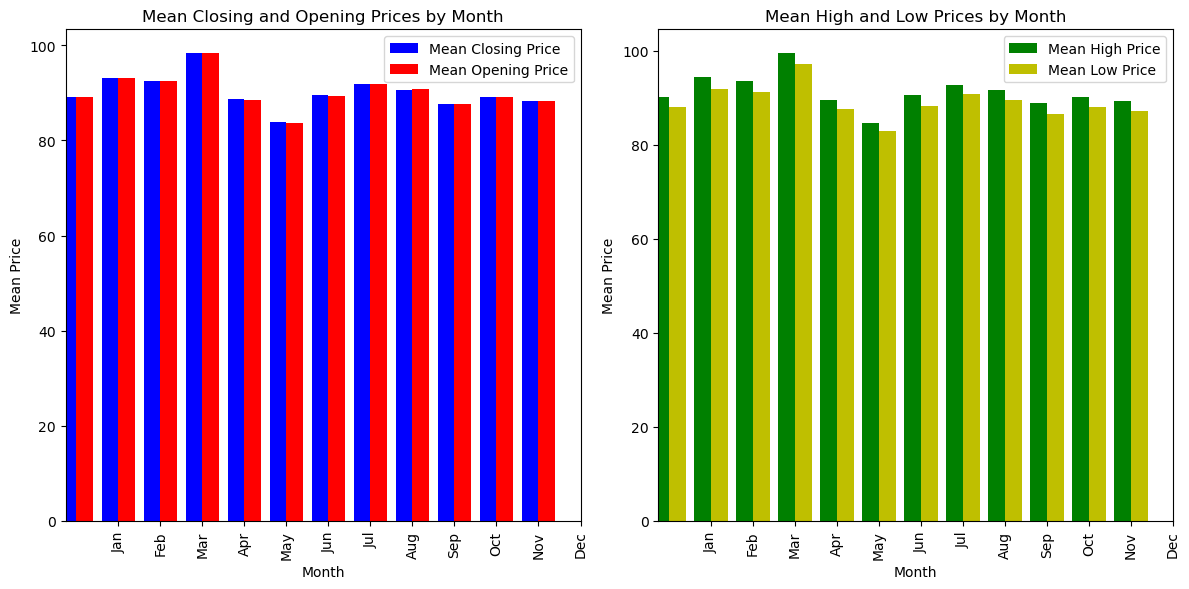

In [20]:
# Set "Date" column as the index
amazon_price.set_index("Date", inplace=True)

# Group the high and low prices by months
monthly_high = amazon_price.groupby(amazon_price.index.month)["High"].mean()
monthly_low = amazon_price.groupby(amazon_price.index.month)["Low"].mean()
# Group the Open and Close prices by months
monthly_close = amazon_price.groupby(amazon_price.index.month)["Close"].mean()
monthly_open = amazon_price.groupby(amazon_price.index.month)["Open"].mean()

# Create a figure and axis object
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the mean closing price by month
monthly_close.plot(kind="bar", color='b', width=0.4, position=1, ax=axs[0], label="Mean Closing Price")

# Plot the mean opening price by month
monthly_open.plot(kind="bar", color='r', width=0.4, position=0, ax=axs[0], label="Mean Opening Price")

# Set the x-axis ticks to display month names
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Set labels and title for the first subplot
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Mean Price")
axs[0].set_title("Mean Closing and Opening Prices by Month")
axs[0].legend()

# Plot the mean high price by month
monthly_high.plot(kind="bar", color='g', width=0.4, position=1, ax=axs[1], label="Mean High Price")

# Plot the mean low price by month
monthly_low.plot(kind="bar", color='y', width=0.4, position=0, ax=axs[1], label="Mean Low Price")

# Set the x-axis ticks to display month names
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Set labels and title for the second subplot
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Mean Price")
axs[1].set_title("Mean High and Low Prices by Month")
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Correlation

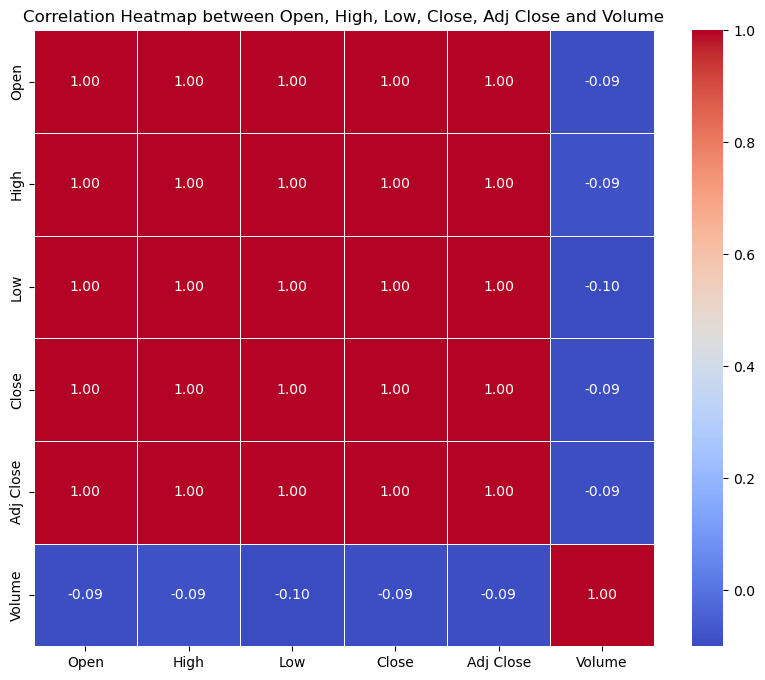

In [21]:
correlation_matrix = amazon_price[['Open', 'High', 'Low', 'Close','Adj Close','Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Open, High, Low, Close, Adj Close and Volume')
plt.show()

#### Relationship

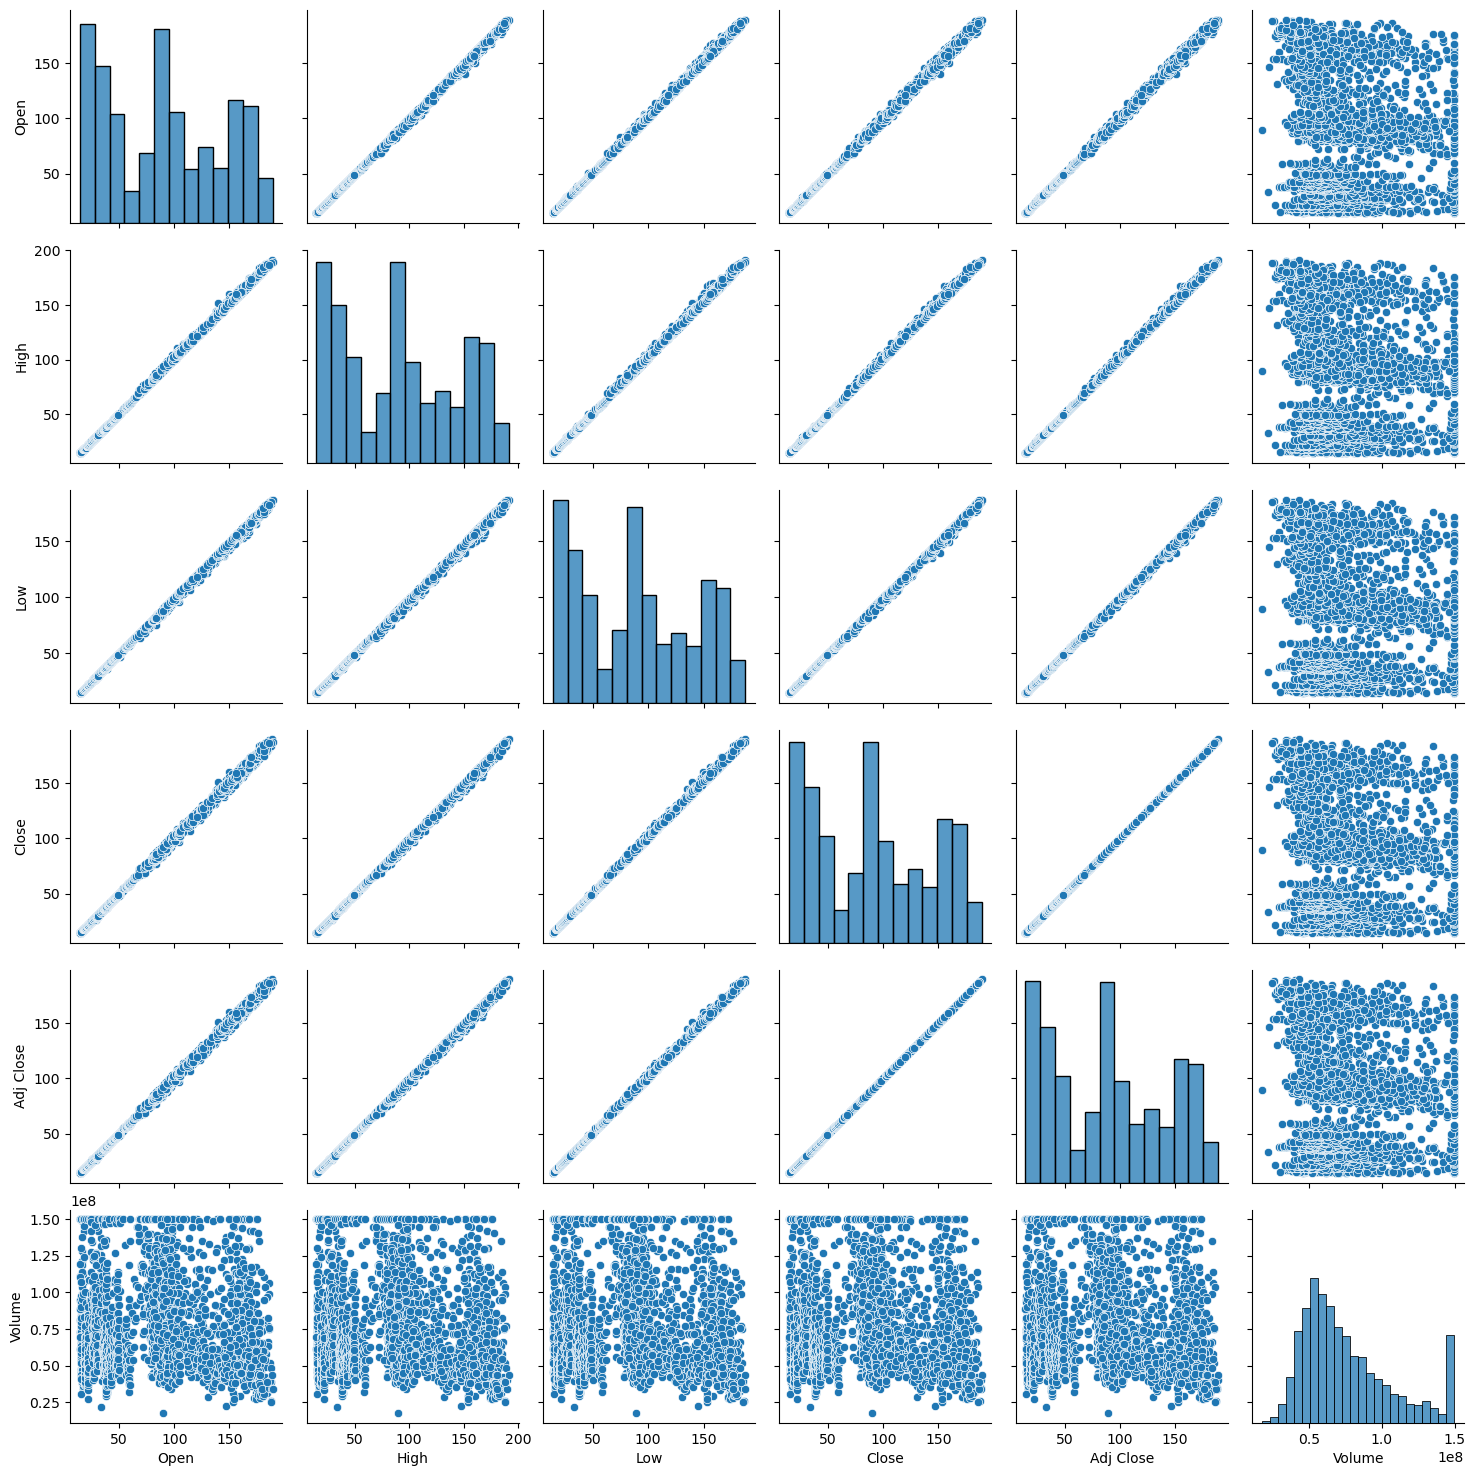

In [22]:
# Create pairplot
sns.pairplot(amazon_price[['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']])
plt.show()

## Preprocessing


* In order to predict the closing price, I will remove the closing price column, adjusted close, volume column, and add technical indicator also add the target column. Then, I will assess the relationship between the remaining attributes and the target column. Afterward, I will normalize and reshape the data, and finally, split it into training and testing sets.

#### Add Technical Indicators

In [23]:
import talib

In [24]:
def feature_construction(df):
    # Simple Moving Averages (SMA)
    df['SMA5'] = talib.SMA(df['Close'], timeperiod=5)
    df['SMA10'] = talib.SMA(df['Close'], timeperiod=10)

    # Weighted Moving Averages (WMA)
    df['wma5'] = talib.WMA(df['Close'], timeperiod=5)
    df['wma10'] = talib.WMA(df['Close'], timeperiod=10)

    # Moving Average Convergence Divergence (MACD)
    macd, macd_signal, macd_hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=6)
    df['macd'] = macd

    # Commodity Channel Index (CCI)
    df['cci'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=20)

    # Price Rate of Change (ROC)
    df['roc'] = talib.ROC(df['Close'], timeperiod=10)

    # Relative Strength Index (RSI)
    df['rsi'] = talib.RSI(df['Close'], timeperiod=14)

    # Momentum
    df['momentum'] = talib.MOM(df['Close'], timeperiod=10)

    # Percentage Price Oscillator (PPO)
    df['ppo'] = talib.PPO(df['Close'], fastperiod=5, slowperiod=10)

    # Standard Deviation (STD)
    df['std'] = talib.STDDEV(df['Close'], timeperiod=5)

    # Stochastic Oscillator (%K)
    slowk, slowd = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period=14)
    df['stoch_k'] = slowk

    # %D line (3-period moving average of %K)
    df['stoch_d'] = talib.SMA(slowk, timeperiod=3)

    df = df.dropna()
    return df


In [25]:
# Preprocess the data and engineer features
amazon_price_processed = feature_construction(amazon_price)
amazon_price_processed

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-06-13   16.352501   16.465000   16.176500   16.313499   16.313499   
2014-06-16   16.243000   16.434500   16.176001   16.381001   16.381001   
2014-06-17   16.377001   16.566999   16.261499   16.281000   16.281000   
2014-06-18   16.400000   16.787500   16.250000   16.719000   16.719000   
2014-06-19   16.763000   16.945000   16.299000   16.350000   16.350000   
...                ...         ...         ...         ...         ...   
2024-05-09  188.880005  191.699997  187.440002  189.500000  189.500000   
2024-05-10  189.160004  189.889999  186.929993  187.479996  187.479996   
2024-05-13  188.000000  188.309998  185.360001  186.570007  186.570007   
2024-05-14  183.820007  187.720001  183.449997  187.070007  187.070007   
2024-05-15  185.970001  186.720001  182.729996  185.990005  185.990005   

                 Volume        SMA5       SMA10        wma5       wma10  \
Date                                                                      
2014-06-13   55296000.0   16.472900   16.116700   16.443033   16.323227   
2014-06-16   48996000.0   16.474100   16.210600   16.412400   16.371282   
2014-06-17   58482000.0   16.406200   16.302750   16.348033   16.384082   
2014-06-18  128030000.0   16.398000   16.440750   16.452300   16.459764   
2014-06-19  106412000.0   16.408900   16.457900   16.436300   16.443264   
...                 ...         ...         ...         ...         ...   
2024-05-09   43368400.0  188.234000  184.047000  188.625999  186.206909   
2024-05-10   34141800.0  188.487997  184.833000  188.374664  186.831090   
2024-05-13   24898600.0  188.062000  185.394000  187.735334  187.146909   
2024-05-14   38698200.0  187.724002  186.601001  187.404670  187.451638   
2024-05-15   75386300.0  187.322003  187.300002  186.826671  187.340548   

                macd         cci       roc        rsi   momentum       ppo  \
Date                                                                         
2014-06-13  0.241058   80.610389  4.389697  67.485687   0.686000  2.210131   
2014-06-16  0.209945   71.965028  6.080819  68.354102   0.939000  1.625481   
2014-06-17  0.168724   68.431028  5.999546  65.560461   0.921500  0.634556   
2014-06-18  0.194153   87.744784  8.996676  71.126672   1.380000 -0.260024   
2014-06-19  0.152328   73.035245  1.060056  62.030764   0.171501 -0.297729   
...              ...         ...       ...        ...        ...       ...   
2024-05-09  2.353210  124.435458  9.114989  61.745700  15.830002  2.274962   
2024-05-10  2.056451   97.541406  4.375905  57.972135   7.860001  1.977459   
2024-05-13  1.666699   73.068089  3.100133  56.302801   5.610001  1.439097   
2024-05-14  1.423807   58.652319  6.897147  57.034881  12.070007  0.601819   
2024-05-15  1.072001   40.873001  3.905031  54.895533   6.990005  0.011747   

                 std    stoch_k    stoch_d  
Date                                        
2014-06-13  0.184757  68.674536  78.136769  
2014-06-16  0.184136  61.713677  69.697318  
2014-06-17  0.180185  61.451572  63.946595  
2014-06-18  0.164113  68.781663  63.982304  
2014-06-19  0.158663  68.221284  66.151506  
...              ...        ...        ...  
2024-05-09  1.117845  92.707525  94.640973  
2024-05-10  0.692428  88.830366  92.353506  
2024-05-13  1.012290  84.830585  88.789492  
2024-05-14  1.004917  81.639104  85.100018  
2024-05-15  1.197652  75.919215  80.796301  

[2498 rows x 19 columns]

#### Add Target Column

In [26]:
amazon_price_processed['TargetNextClose'] = amazon_price_processed['Close'].shift(-1)

C:\Users\mofok\AppData\Local\Temp\ipykernel_27672\3255203154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_price_processed['TargetNextClose'] = amazon_price_processed['Close'].shift(-1)


#### Delete Nan Value in the Target colum

In [27]:
amazon_price_processed.dropna(inplace=True)

C:\Users\mofok\AppData\Local\Temp\ipykernel_27672\559951929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_price_processed.dropna(inplace=True)


#### Drop Close, Volume and Adj Close

In [28]:
amazon_price_processed.drop(columns=['Close','Volume','Adj Close'], inplace=True)

C:\Users\mofok\AppData\Local\Temp\ipykernel_27672\1233591140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_price_processed.drop(columns=['Close','Volume','Adj Close'], inplace=True)


#### Check the relation of attributes to target column

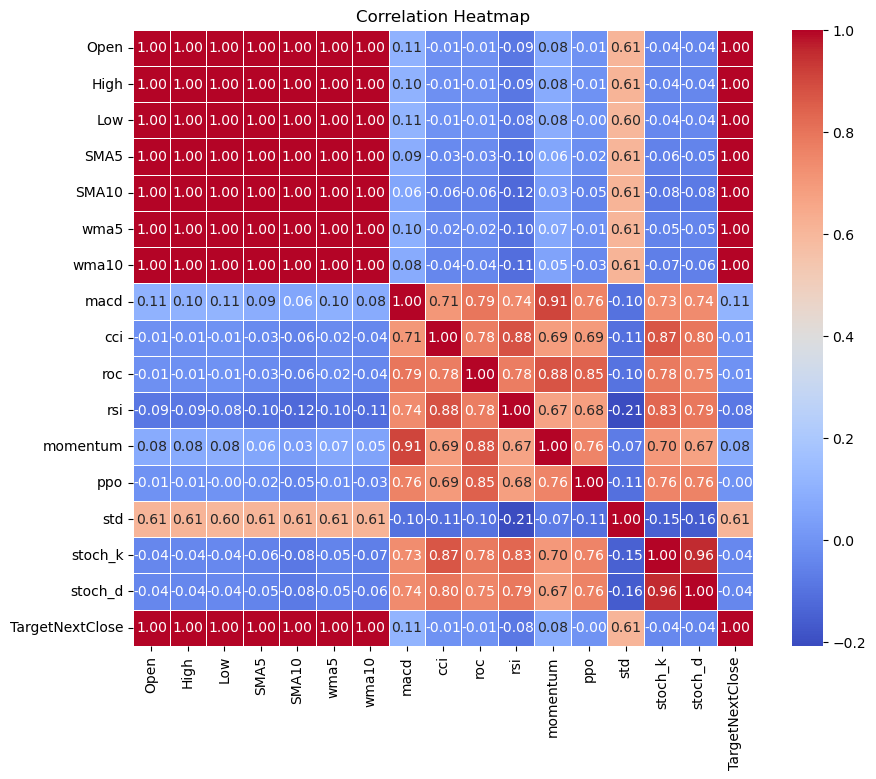

In [29]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(amazon_price_processed.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Normalize the data

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(amazon_price_processed)
print(data_set_scaled)

[[0.0121899  0.01097196 0.01140903 ... 0.69118551 0.79148625 0.01160989]
 [0.01156396 0.01079981 0.01140615 ... 0.61979132 0.70292463 0.01103895]
 [0.01232994 0.01154764 0.01189967 ... 0.61710303 0.6425779  0.01353963]
 ...
 [1.         0.98978436 0.99705605 ... 0.89791419 0.94067335 0.98327176]
 [0.99336913 0.98086681 0.98799352 ... 0.85689036 0.90327342 0.98612642]
 [0.96947527 0.97753687 0.97696834 ... 0.82415687 0.86455695 0.97996035]]


#### Reshape 

In [31]:
# multiple feature from data provided to the model
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(16):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(X.shape)
print(y.shape)

2497
(2467, 30, 16)
(2467, 1)


#### Split the data into training and testing

In [32]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1973
(1973, 30, 16)
(494, 30, 16)
(1973, 1)
(494, 1)
[[0.00943464]
 [0.01015115]
 [0.00743352]
 ...
 [0.51242488]
 [0.5276973 ]
 [0.5522616 ]]


# Model Design

* This step involves designing the structure of the model. The model comprises an input layer with three-dimensional input, an LSTM layer with 75 units, a dropout layer with a learning rate of 0.2, a dense (fully connected) layer with 1 unit, and an output layer.

In [33]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Activation

# Define model architecture with Dropout layer
lstm_input = Input(shape=(backcandles, 16), name='lstm_input')
lstm_layer = LSTM(75, name='first_layer')(lstm_input)
dropout_layer = Dropout(0.2)(lstm_layer)  # Dropout rate can be adjusted as needed
dense_layer = Dense(1, name='dense_layer')(dropout_layer)
output = Activation('linear', name='output')(dense_layer)

# Create the model
model = Model(inputs=lstm_input, outputs=output)
# Model summary
print('Model Summary:')
model.summary()

Model Summary:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 16)]          0         
                                                                 
 first_layer (LSTM)          (None, 75)                27600     
                                                                 
 dropout (Dropout)           (None, 75)                0         
                                                                 
 dense_layer (Dense)         (None, 1)                 76        
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 27676 (108.11 KB)
Trainable params: 27676 (108.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

* This phase involves training the model on the training dataset. The model is validated using mean square error. It is trained on the training dataset and validated on the testing data. To avoid overfitting and bias, shuffle is used to control the data selected for training. Additionally, a batch size of 32 is employed for each epoch (30 epochs in total).

In [34]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train ,validation_data=(X_test,y_test),shuffle=True,epochs=30,batch_size=32,verbose=1)

Epoch 1/30
62/62 [==============================] - 3s 21ms/step - loss: 0.0205 - val_loss: 0.0032
Epoch 2/30
62/62 [==============================] - 1s 14ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 3/30
62/62 [==============================] - 1s 14ms/step - loss: 0.0032 - val_loss: 9.2101e-04
Epoch 4/30
62/62 [==============================] - 1s 14ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 5/30
62/62 [==============================] - 1s 17ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 6/30
62/62 [==============================] - 1s 14ms/step - loss: 0.0020 - val_loss: 9.5114e-04
Epoch 7/30
62/62 [==============================] - 1s 13ms/step - loss: 0.0019 - val_loss: 7.8841e-04
Epoch 8/30
62/62 [==============================] - 1s 13ms/step - loss: 0.0016 - val_loss: 8.6849e-04
Epoch 9/30
62/62 [==============================] - 1s 12ms/step - loss: 0.0015 - val_loss: 9.7524e-04
Epoch 10/30
62/62 [==============================] - 1s 17ms/step - loss: 0.0015 - val_lo

# Model Testing

* In this phase, the model is evaluated. First, predictions are made, and a line chart is plotted to compare the predicted values against the actual values. Additionally, the training and validation losses are printed. Mean Square Error, Mean Absolute Error, and Coefficient of Determination are then utilized to evaluate the performance of the model

#### Prediction

In [36]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 0s 4ms/step
[0.5385096] [0.57549278]
[0.54902947] [0.60439904]
[0.56207204] [0.61281739]
[0.5848172] [0.63466694]
[0.5984155] [0.61661979]
[0.61865914] [0.63055053]
[0.6214228] [0.62033085]
[0.6285542] [0.60993991]
[0.62433124] [0.58122209]
[0.622335] [0.54411157]


#### Comparision Line Chart

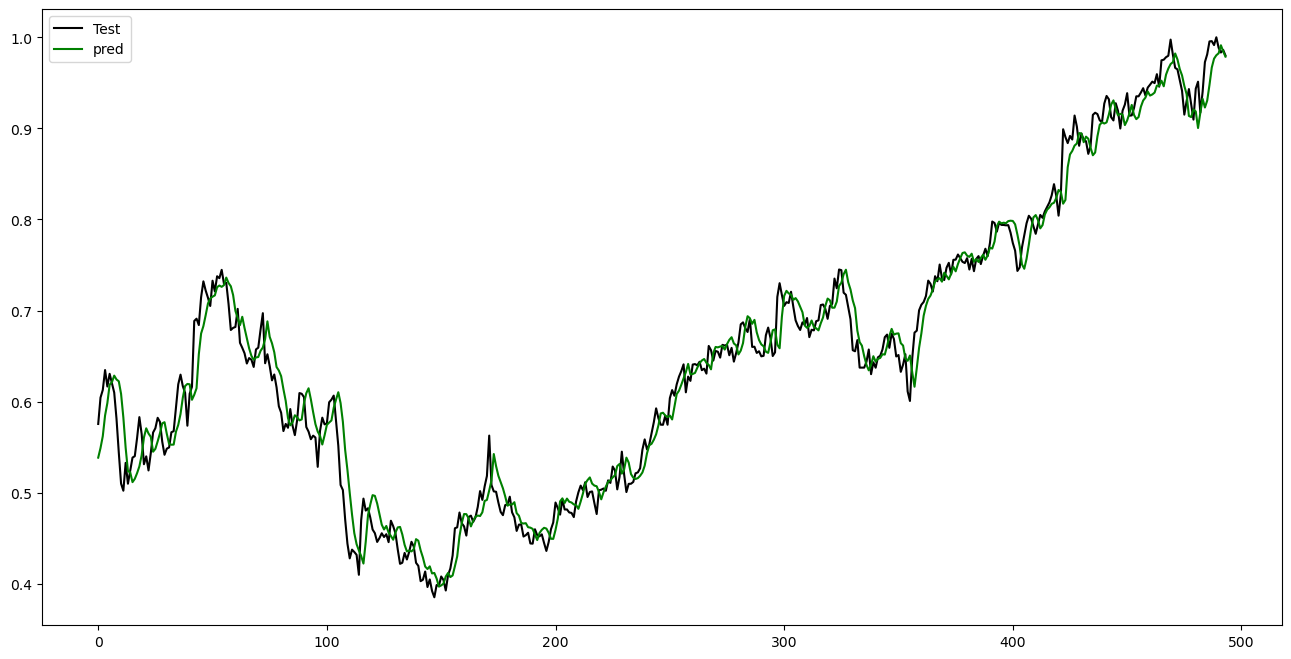

In [37]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

#### Training and Validation Loss

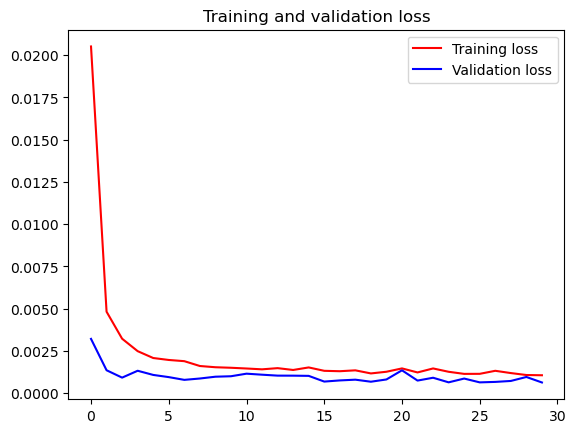

<Figure size 640x480 with 0 Axes>

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

#### Evaluation Matrix

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Assuming y_true and y_pred are your true and predicted values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("MAE: ", mae)
print("R Squared: ", r2)

MSE:  0.0006337381854976
MAE:  0.01906132404364706
R Squared:  0.9744447757676089


# Close Price Prediction

* In this phase, the next day closing price of Amazon is predicted, followed by visualization of the closing price on a line chart.

In [52]:
from numpy import array

# Ensure y has enough sequences
if len(X_test) < backcandles:
    raise ValueError("The dataset y must contain at least backcandles number of elements")

# Initialize temp_input using the last backcandles elements from x
temp_input = np.array(X_test[-backcandles:])

# Initialize the output list
lst_output = []

# Prepare the input for the model
x_input = temp_input

# Predict the next day's closing price
yhat = model.predict(x_input, verbose=0)

# Append the prediction to the output list
lst_output.extend(yhat.tolist())

print("Scalled predicted closing price: ", lst_output[0])

Scalled predicted closing price:  [0.9467672109603882]


#### Visualise the data with predict next day closing price

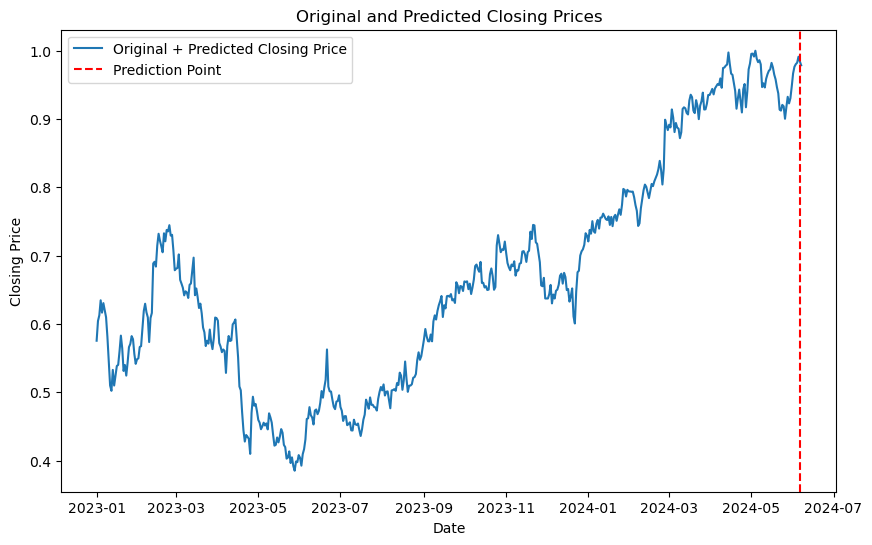

In [53]:
# Assuming the last column in the original dataset is the closing price
original_closing_prices = data_set_scaled[-len(X_test):, -1]

# Combine the original and predicted closing prices for visualization
# Create an array that combines the original closing prices with the predicted closing price
combined_prices = np.append(original_closing_prices, lst_output)

# Create a DataFrame for better handling and plotting
dates = pd.date_range(start="2023-01-01", periods=len(combined_prices))  # Modify the start date as needed
price_data = pd.DataFrame({'Date': dates, 'Closing Price': combined_prices})

# Plotting the original and predicted closing prices
plt.figure(figsize=(10, 6))
plt.plot(price_data['Date'], price_data['Closing Price'], label='Original + Predicted Closing Price')
plt.axvline(x=dates[-2], color='r', linestyle='--', label='Prediction Point')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Original and Predicted Closing Prices')
plt.legend()
plt.show()